# Uczenie głębokie (*ang. Deep Learning, DL)

Sieci, które mają mniej niż 2 warstwy ukryte przyjęło się nazywać sieciami płytkimi (ang. shallow networks), sieci które mają więcej niż 2 warstwy - sieciami głębokimi (*ang. deep networks*). Sieci głębokie mają tendencje do dokładniejszego odwzorowywania zależności nieliniowych.

Polecane materiały:
* [`Andrew Ng`](https://www.deeplearning.ai)
* [`MIT`](https://deeplearning.mit.edu)
* [`MIT`](http://introtodeeplearning.com)

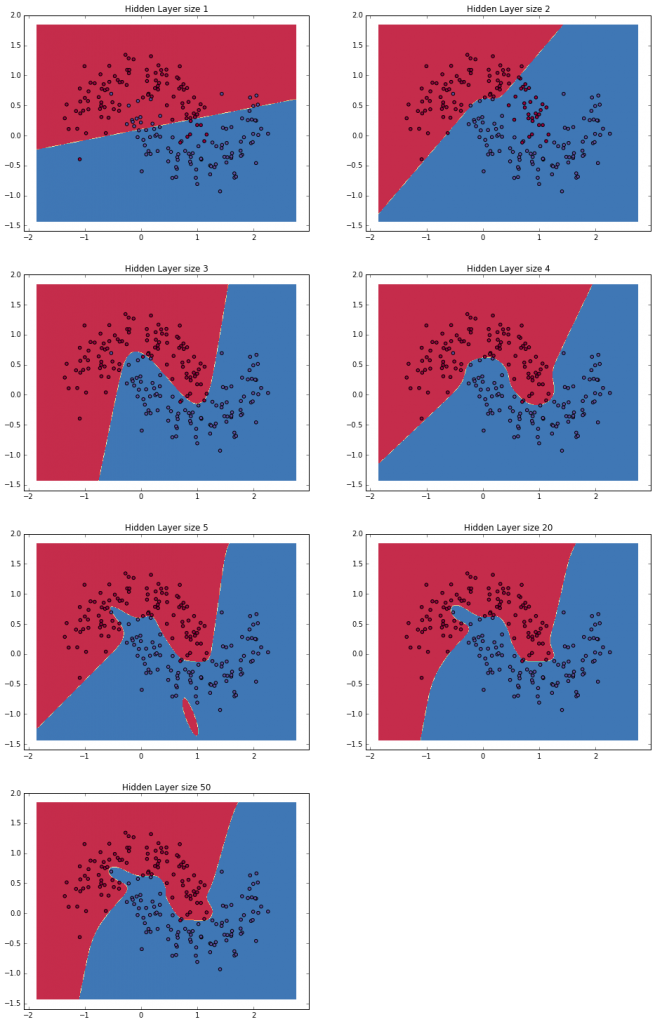
\;
<center>
Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów (sieć jednowarstwowa)
</center>

W poprzednich przykładach tworzyliśmy już głębokie sieci neuronowe (16, 8 , 3) - trzy warstwy ukryte. W tym notatniku do pracy z sieciami neuronowymi użyjemy nowej biblioteki - tensorflow.

# Biblioteka TensorFlow

### Importowanie biblioteki

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

print(tf.__version__)

Tensorflow jak sama nazwa wskazuje to biblioteka do pracy z tensorami. W Tensorflow tensory są to wielowymiarowe tablice o jednolitym typie (`dtype`).

Dwie podstawowe klasy biblioteki tensorflow reprezentujące tenosory to:
* tf.Tensor (tensor niemodyfikowalny, niezmienny podobnie jak liczba czy łańcuch znaków w pythonie)
* tf.Variable (tensor modyfikowalny)

## tf.Tensor

### Tworzenie obiektów klasy tf.Tensor

Twórcy tensorflow nie zalecają bezpośredniego inicjalizowania obiektów klasy `tf.Tensor`. Zamiast tego udostępniają rodzinę funkcji fabrykujących (takich jak `tf.constant` czy `tf.zeros`), które odpowiadają za tworzenie obiektów klasy tf.Tensor.

In [ ]:
# Obiekt klasy tf.Tensor możemy tworzyć za pomocą funkcji tf.constant
x = tf.constant([[1, 2, 3, 4 ,5]]) # parametrem przekazanym do funkcji constant
# może być int, float, string, boolean oraz dowolny typ iterowalny (np. tablica 
# numpy, instancja klasy tf.Tensor, generator range)

print(x)

## Variable

W odróżnieniu od obiektów klasy tf.Tensor, obiekty klasy tf.Variable są mutowalne. W obiektach klasy tf.Variable możemy przechowywać wartości, którymi program manipuluje w trakcie działania (np. wagi modeli, które w trakcie fazy uczenia są aktualizowane). Obiekty klasy tf.Variable reprezentują tensory, których wartości mogą się zmienić w skutek wykonania na tych tensorach jakieś operacji. Wysokopoziomowe moduły (takie jak `tf.keras`) przechowują w tf.Variable parametry modelu.

### Tworzenie

Obiekt klasy `tf.Variable` możemy stworzyć poprzez zrzutowanie na `tf.Variable` obietu klasy `tf.Tensor`.

In [ ]:
# Stworzenie obiektu klasy tf.Tensor
a = tf.constant(
    [
     [0.0, 1.0],
     [2.0, 3.0]
    ]
)

# rzutowanie obiektu klasy tf.Tensor na obiekt klasy tf.Variable
# (inicjalizowanie obiektu klasy tf.Variable obiektem klasy tf.Tensor)
var_a = tf.Variable(a)
print(var_a)

### Przerywnik - obrazy cyfrowe

Doinstalujmy bibliotekę matplotlib

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('cat.jpeg')
print(img)

In [ ]:
print(type(img))

In [ ]:
print(img.shape)

In [ ]:
plt.imshow(img)

In [ ]:
output_img = img.copy()  # oryginalny (wczytany) obraz nie jest modyfikowalny
output_img[:, :, :-1] = 0  # zerujemy wszystkie kanały prócz ostatniego (niebieskiego)

In [ ]:
plt.imshow(output_img)

In [ ]:
output_img2 = img.copy()
output_img2[:, :, 0] = 0  # zerujemy pierwszy kanał (zerujemy czerwony, zielony i niebieski zostają niezmienione)

In [ ]:
plt.imshow(output_img2)

In [ ]:
output_img = img.copy()
modified_img = np.flipud(output_img)

In [ ]:
plt.imshow(modified_img)

In [ ]:
output_img = np.abs(img.copy() - np.array([255]))  # negatyw

In [ ]:
plt.imshow(output_img)

## Wysokopoziomowy interfejs Keras

#### Spróbujmy nauczyć jakąś głęboką sieć (mlp) rozpoznawać obrazy.

### Importy

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

In [ ]:
# Załadowanie rozszerzenia tensorboard
%load_ext tensorboard

In [ ]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Dane treningowe: {len(x_train)} próbek")
print(f"Dane testowe: {len(x_test)} próbek")

In [ ]:
x_train[0]

In [ ]:
type(x_train[0])

In [ ]:
plt.imshow(x_train[0])

### Budowanie modelu

Keras posiada dwie metody tworzenia modelu sieci neuronowej:
* sekwencyjne API (aka model sekwencyjny - tf.keras.models.Sequential)
* funkcyjne API

Najpierw zdefiniujmy model przy użyciu bardziej popularnego, **sekwencyjnego api**.

In [ ]:
model = tf.keras.models.Sequential()

layer_1 = tf.keras.layers.Flatten(input_shape=(28, 28))
layer_2 = tf.keras.layers.Dense(128, activation='relu')
layer_3 = tf.keras.layers.Dropout(0.2)  # regularization layer
layer_4 = tf.keras.layers.Dense(10, activation='softmax')  # normalization layer

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)


# # moglibyśmy to równie dobrze wszystko zmieścić w jednym wywołaniu
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

A jak wyglądałoby definiowanie modelu przy użyciu funkcyjnego API ?

In [ ]:
# warstwę poprzednią przekazujemy do warstwy następującej po niej
input_layer = tf.keras.layers.Input(shape=(28, 28))
layer_1 = tf.keras.layers.Flatten(input_shape=(28, 28))(input_layer)
layer_2 = tf.keras.layers.Dense(128, activation='relu')(layer_1)
layer_3 = tf.keras.layers.Dropout(0.2)(layer_2)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(layer_3)

# i definiujemy model przekazując mu warstwę wejściową oraz warstwę wyjściową
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

Dla każdego przykładu model zwraca wektor wyników [logit](https://developers.google.com/machine-learning/glossary#logits) lub [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) , po jednym dla każdej klasy.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

### Konfiguracja i kompilacja modelu

In [ ]:
model.compile(
    optimizer='adam',  # optymalizator adam/SGD
    loss='sparse_categorical_crossentropy',  # funkcja strat 
    metrics=['accuracy']  # metryki
)

**adam** (ang. **ada**ptive **m**oment estimation) - optymalizator, można porównać z dodawaniem lub zmniejszaniem przyśpieszenia w zależności od stromizny zbocza podczas poruszania się po pagórkowatym terenie.

**sparse_categorical_crossentropy** to funkcja strat równa ujemnemu logarytmicznemu prawdopodobieństwu prawdziwej klasy. Jej wartość wynosi zero, jeśli model jest pewien, że klasa jest prawidłowa.

**accuracy** - dokładność modelu (stosunek poprawnych predykcji do całkowitej liczby predykcji)

In [ ]:
# Tworzenie callbacku na potrzeby tensorboard
import datetime

log_dir = 'adam_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### Trenowanie modelu razem z walidacją (sprawdzeniem wydajności modelu)

In [ ]:
r = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=5,
    callbacks=[
        tensorboard_callback
    ]
)  # accuracy - training accuracy, val_accuracy - test (validation) accuracy

### Wyświetlenie statystyk treningu

In [ ]:
# strata
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# dokładność
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Macierz błędu (ang. confusion matrix)

In [ ]:
!pip install scikit-learn

In [ ]:
# Popatrzmy jeszcze na macierz błędu i zobaczmy z jakimi przykładami
# sieć sobie nie poradziła.
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues
):
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

In [ ]:
# Wyświetlmy kilka nieprawidłowo zaklasyfikowanych obrazów
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f"True label: {y_test[i]} Predicted: {p_test[i]}")

In [ ]:
%tensorboard --logdir './{log_dir}'

#### Zadanie 4

Stwórz swoją sieć (analogicznie do przykładu powyżej) i naucz ją rozpoznawać obrazy na zbiorze [`cifar10`](https://www.tensorflow.org/datasets/catalog/cifar10).